# FRAUD DETECTION PROJECT.

### Project By Pranav Kalbhor, Nikhil Khaladkar, Harshit Shukla, Siddesh Rao

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpt
import seaborn as sns

creditdata = pd.read_csv("creditcard.csv")

In [60]:
creditdata.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [61]:
creditdata.shape

(284807, 31)

In [62]:
creditdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [63]:
null_values = creditdata.isnull().sum()
print(null_values)

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [64]:
creditdata.select_dtypes(include=['category', 'object']).dtypes

Series([], dtype: object)

In [65]:
creditdata.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [66]:
print(creditdata['Class'].value_counts())

0    284315
1       492
Name: Class, dtype: int64


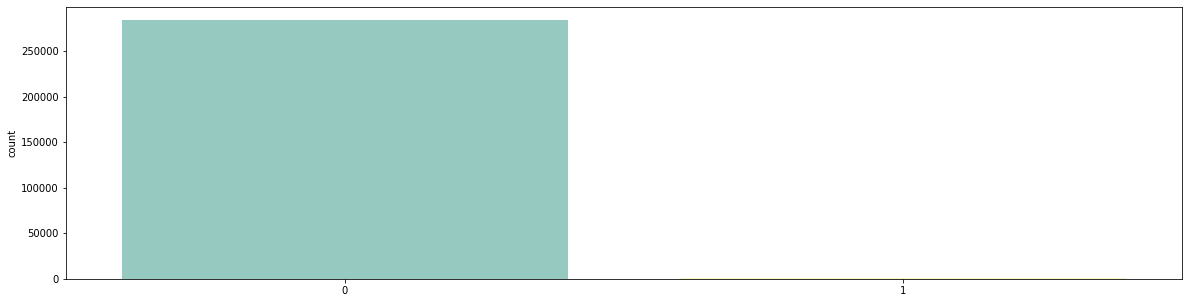

In [9]:
fig,ax=plt.subplots(figsize=(20,5))
sns.countplot(creditdata.Class.values,palette="Set3")

In [10]:
creditdata.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

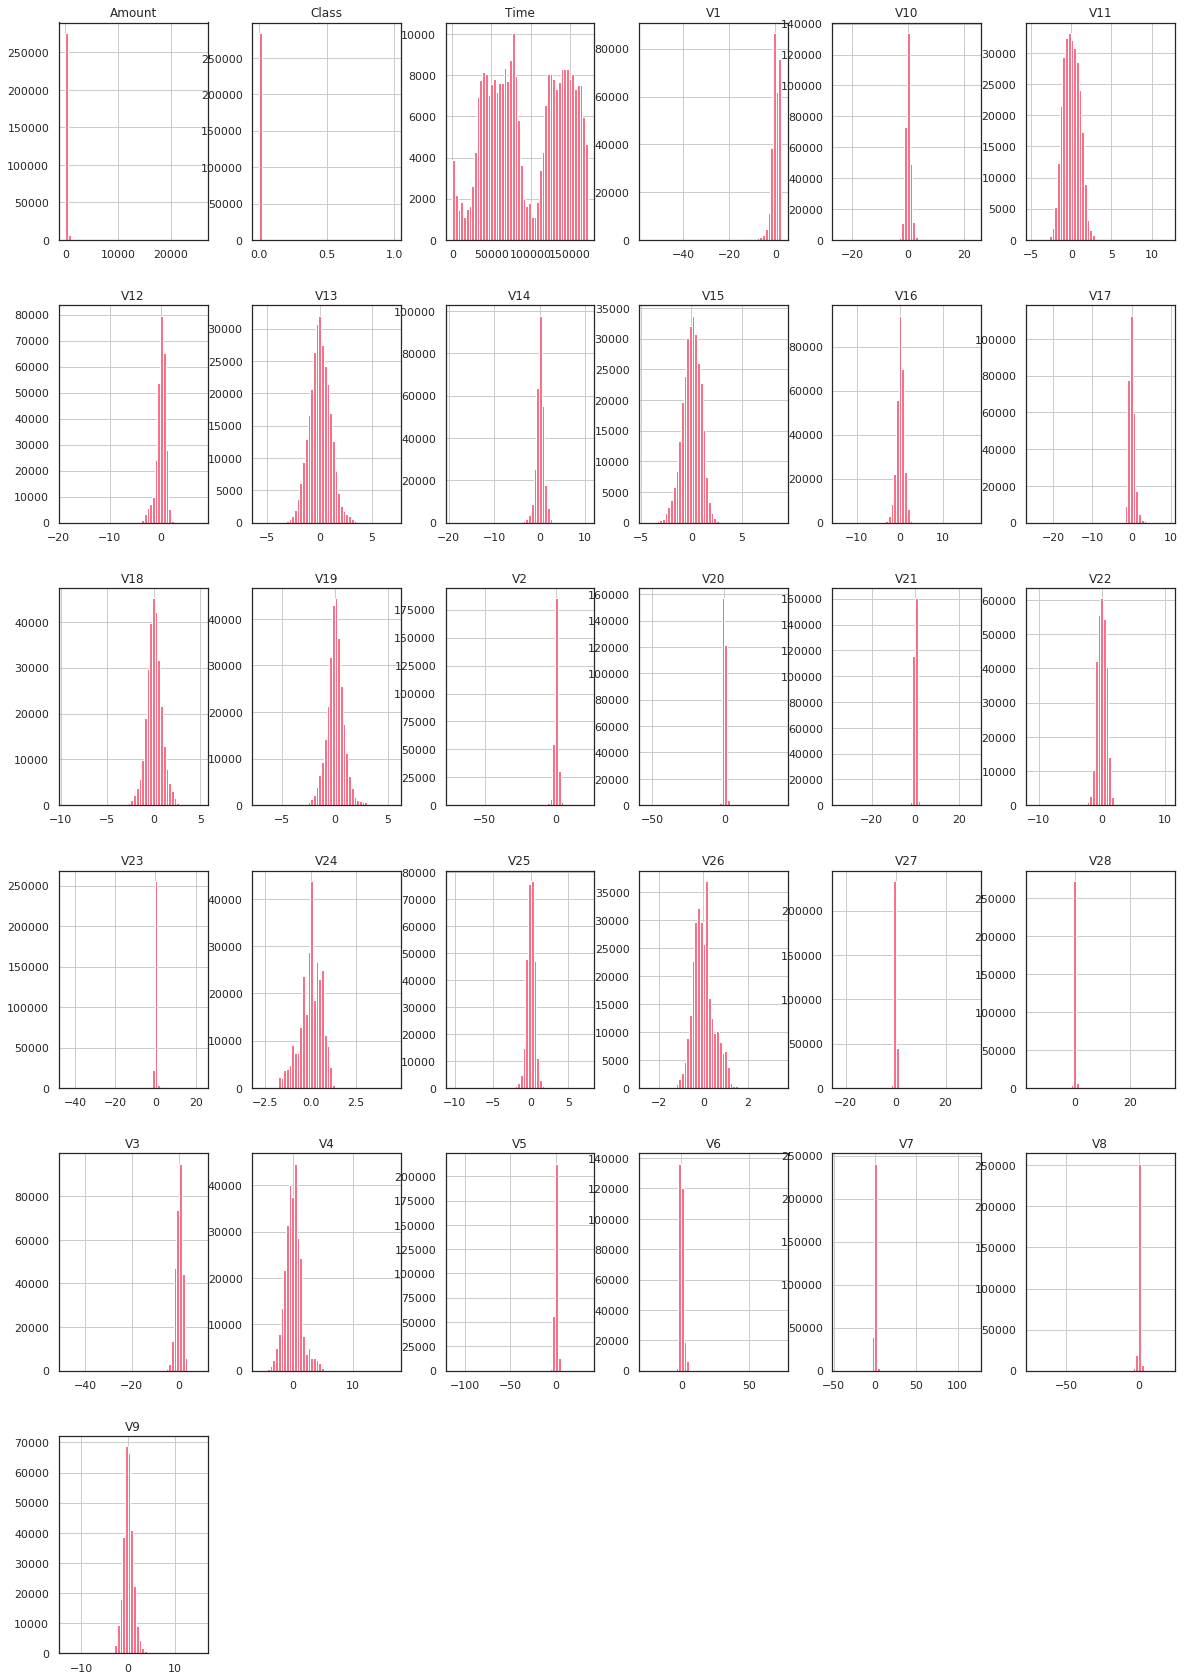

In [11]:
sns.set(color_codes=True)
sns.set(style="white", palette="husl")
creditdata.hist(bins=50, figsize=(20,30))
plt.show()

Text(0, 0.5, '')

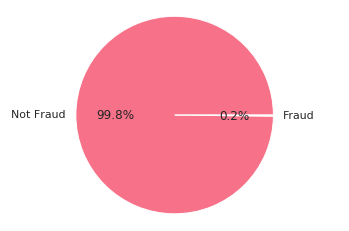

In [12]:
fig, ax = plt.subplots(1, 1)
ax.pie(creditdata.Class.value_counts(),autopct='%1.1f%%', labels=['Not Fraud','Fraud'])
plt.axis('equal')
plt.ylabel('')

Text(0, 0.5, 'transactions')

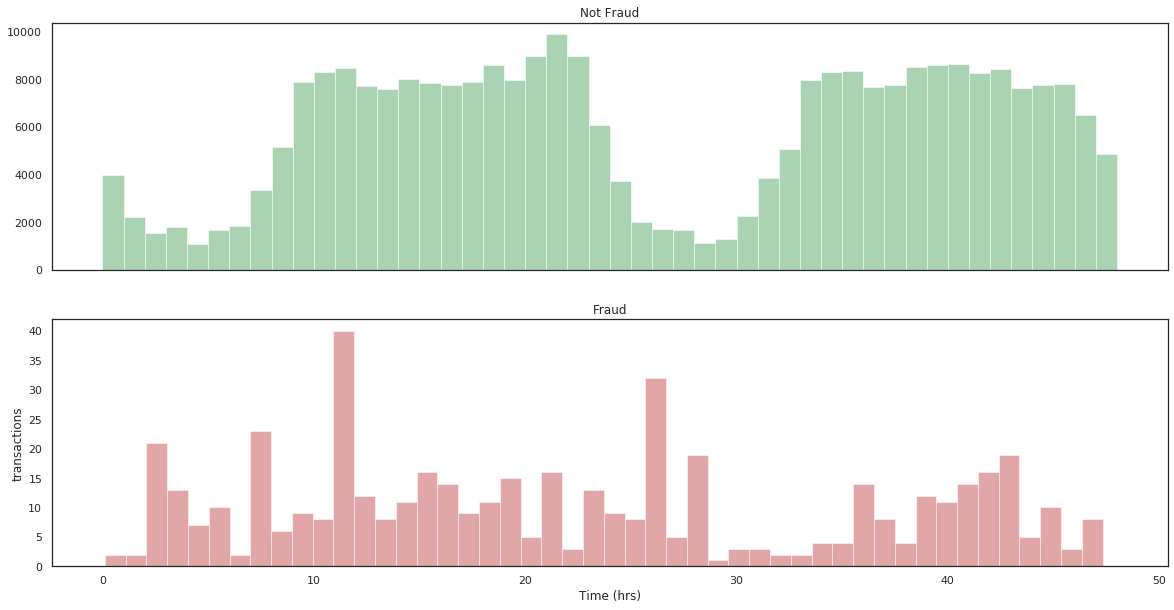

In [67]:
creditdata["Time_in_Hrs"] = creditdata["Time"]/3600
fig, (a1, a2) = plt.subplots(2, 1, sharex = True, figsize=(20,10))
a1.hist(creditdata.Time_in_Hrs[creditdata.Class==0],bins=48,color='g',alpha=0.5)
a1.set_title('Not Fraud')
a2.hist(creditdata.Time_in_Hrs[creditdata.Class==1],bins=48,color='r',alpha=0.5)
a2.set_title('Fraud')
plt.xlabel('Time (hrs)')
plt.ylabel('transactions')

Text(0, 0.5, 'transactions')

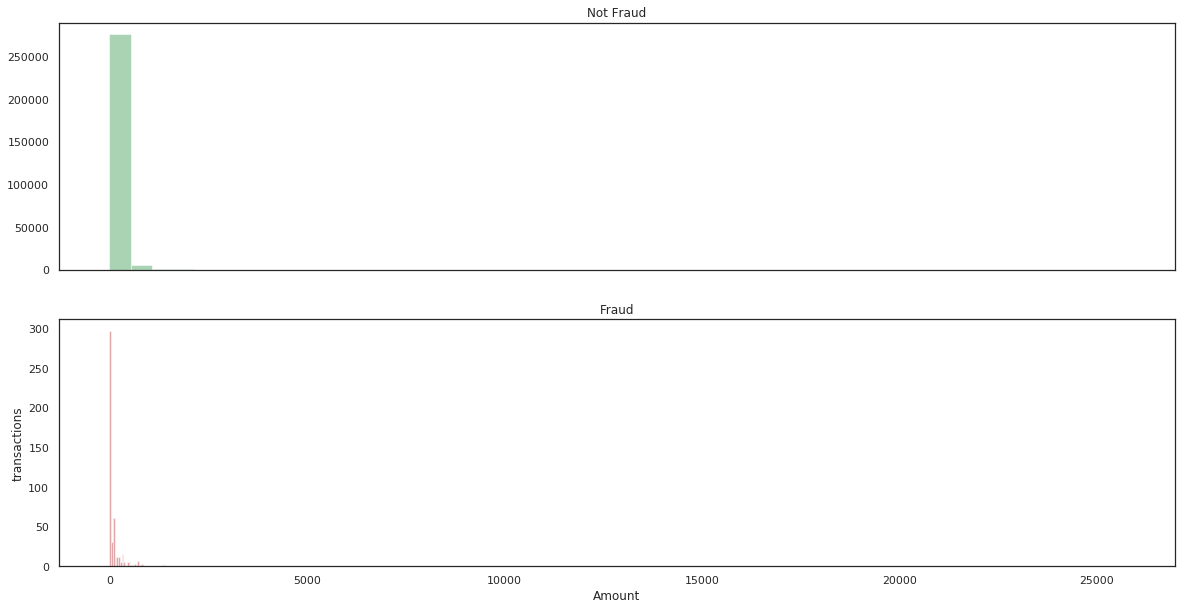

In [68]:
# creditdata = creditdata.drop(['Time'],axis=1)
fig, (a1, a2) = plt.subplots(2, 1, sharex = True, figsize=(20,10))
a1.hist(creditdata.Amount[creditdata.Class==0],bins=48,color='g',alpha=0.5)
a1.set_title('Not Fraud')
a2.hist(creditdata.Amount[creditdata.Class==1],bins=48,color='r',alpha=0.5)
a2.set_title('Fraud')
plt.xlabel('Amount')
plt.ylabel('transactions')

In [69]:
from sklearn.preprocessing import StandardScaler
creditdata['scaled_Amount'] = StandardScaler().fit_transform(creditdata['Amount'].values.reshape(-1,1))
# creditdata = creditdata.drop(['Amount'],axis=1)

In [70]:
creditdata['scaled_Amount'].head()

0    0.244964
1   -0.342475
2    1.160686
3    0.140534
4   -0.073403
Name: scaled_Amount, dtype: float64

In [71]:
creditdata = creditdata.drop(['Time'],axis=1)
creditdata = creditdata.drop(['Amount'],axis=1)

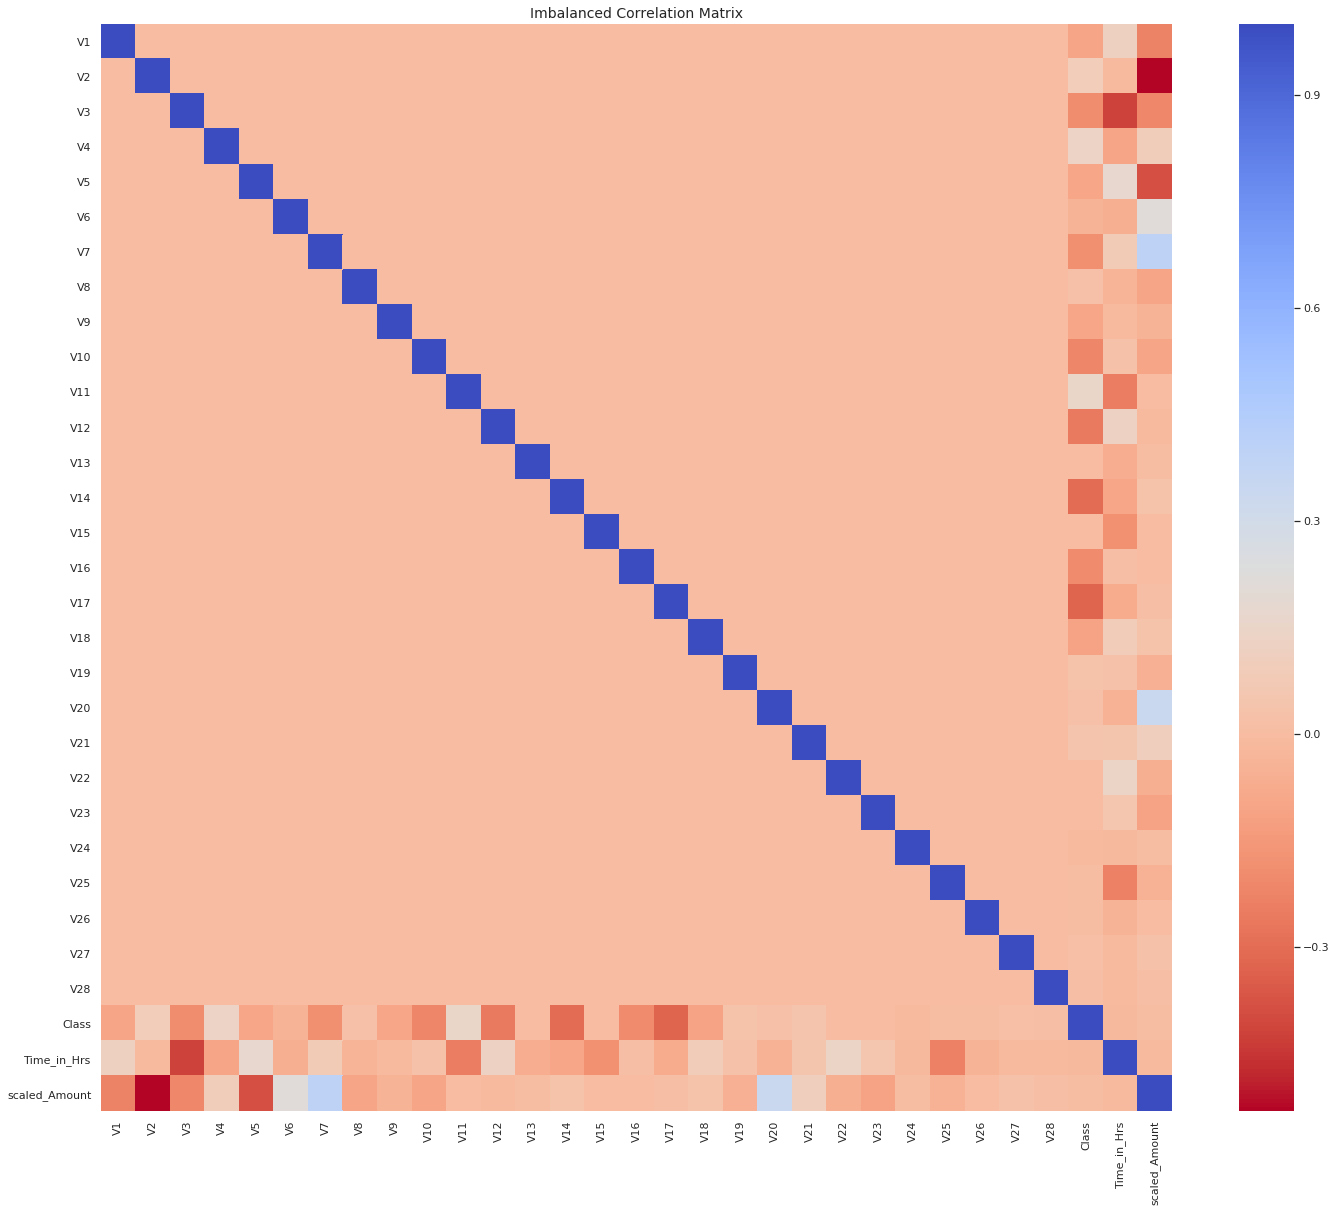

In [18]:
fig, ax = plt.subplots(figsize=(24,20))
correlation = creditdata.corr()
sns.heatmap(correlation, cmap='coolwarm_r', annot_kws={'size':20}, ax = ax)
ax.set_title("Imbalanced Correlation Matrix", fontsize=14)
plt.show()

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import confusion_matrix,auc,roc_auc_score
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC

In [20]:
from sklearn.model_selection import train_test_split, KFold

X = creditdata.drop(['Class'],axis=1).values
Y = creditdata['Class'].values
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.25,random_state=25)
# X_train.head()
# X_test.head()
# y_train.head()
# y_test.head()

In [21]:
models = ["LinearRegression", 
          "DecisionTree", 
          "RandomForest-Default", 
          "RandomForest-Custom",
          "SupportVectorMachine",
          "GaussianNB",
          "LogisticRegression",
          "KNearest"
         ]
train_rmses = {}
test_rmses = {}

In [22]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# y_pred_prob = model.predict_proba(X_test)
train_pred = model.predict(X_train)
print('train-set confusion matrix:\n ', confusion_matrix(y_train,train_pred))



# model.intercept_, model.coef_

train-set confusion matrix:
  [[213246      0]
 [     0    359]]


In [23]:
print('test-set confusion matrix:\n', confusion_matrix(y_test,y_pred)) 
print("recall score: ", recall_score(y_test,y_pred))
print("precision score: ", precision_score(y_test,y_pred))
print("f1 score: ", f1_score(y_test,y_pred))
print("accuracy score: ", accuracy_score(y_test,y_pred))

test-set confusion matrix:
 [[71031    38]
 [   28   105]]
recall score:  0.7894736842105263
precision score:  0.7342657342657343
f1 score:  0.7608695652173912
accuracy score:  0.9990730597455127


In [24]:
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# y_pred_prob = model.predict_proba(X_test)
train_pred = model.predict(X_train)
print('train-set confusion matrix:\n ', confusion_matrix(y_train,train_pred))

train-set confusion matrix:
  [[208567   4679]
 [    66    293]]


In [25]:
print('test-set confusion matrix:\n', confusion_matrix(y_test,y_pred)) 
print("recall score: ", recall_score(y_test,y_pred))
print("precision score: ", precision_score(y_test,y_pred))
print("f1 score: ", f1_score(y_test,y_pred))
print("accuracy score: ", accuracy_score(y_test,y_pred))

test-set confusion matrix:
 [[69454  1615]
 [   18   115]]
recall score:  0.8646616541353384
precision score:  0.06647398843930635
f1 score:  0.1234567901234568
accuracy score:  0.9770652509760962


In [26]:
model = LogisticRegression(C = 0.01, penalty = 'l1')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# y_pred_prob = model.predict_proba(X_test)
train_pred = model.predict(X_train)
print('train-set confusion matrix:\n ', confusion_matrix(y_train,train_pred))

/dsci/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


train-set confusion matrix:
  [[213213     33]
 [   173    186]]


In [27]:
print('test-set confusion matrix:\n', confusion_matrix(y_test,y_pred)) 
print("recall score: ", recall_score(y_test,y_pred))
print("precision score: ", precision_score(y_test,y_pred))
print("f1 score: ", f1_score(y_test,y_pred))
print("accuracy score: ", accuracy_score(y_test,y_pred))

test-set confusion matrix:
 [[71064     5]
 [   58    75]]
recall score:  0.5639097744360902
precision score:  0.9375
f1 score:  0.7042253521126761
accuracy score:  0.999115193393444


In [28]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# y_pred_prob = model.predict_proba(X_test)
train_pred = model.predict(X_train)
print('train-set confusion matrix:\n ', confusion_matrix(y_train,train_pred))

train-set confusion matrix:
  [[213231     15]
 [    93    266]]


In [29]:
print('test-set confusion matrix:\n', confusion_matrix(y_test,y_pred)) 
print("recall score: ", recall_score(y_test,y_pred))
print("precision score: ", precision_score(y_test,y_pred))
print("f1 score: ", f1_score(y_test,y_pred))
print("accuracy score: ", accuracy_score(y_test,y_pred))

test-set confusion matrix:
 [[71058    11]
 [   33   100]]
recall score:  0.7518796992481203
precision score:  0.9009009009009009
f1 score:  0.819672131147541
accuracy score:  0.9993820398303418


In [30]:
# model = SVC()
# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)
# # y_pred_prob = model.predict_proba(X_test)
# train_pred = model.predict(X_train)
# print('train-set confusion matrix:\n ', confusion_matrix(y_train,train_pred))

In [31]:
# print('test-set confusion matrix:\n', confusion_matrix(y_test,y_pred)) 
# print("recall score: ", recall_score(y_test,y_pred))
# print("precision score: ", precision_score(y_test,y_pred))
# print("f1 score: ", f1_score(y_test,y_pred))
# print("accuracy score: ", accuracy_score(y_test,y_pred))

## Over Sampling

In [72]:
fraud = creditdata[creditdata['Class']==1]

NotFraud = creditdata[creditdata['Class']==0]

In [73]:
fraud.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,Time_in_Hrs,scaled_Amount
541,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,...,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,1,0.112778,-0.353229
623,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,...,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,1,0.131111,1.761758
4920,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,...,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,1,1.239444,0.606031
6108,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,...,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,1,1.940556,-0.117342
6329,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,...,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1,2.088611,-0.349231


In [74]:
NotFraud.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,Time_in_Hrs,scaled_Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.000000,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,0.000000,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,0.000278,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.000278,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.000556,-0.073403


In [35]:
# from imblearn.under_sampling import NearMiss
# from imblearn import over_sampling
# import imbalanced-learn
# from sklearn.utils import NearMiss

In [75]:
from sklearn.utils import resample

In [76]:
not_fraud_data=creditdata[creditdata.Class==0]
fraud_data=creditdata[creditdata.Class==1]

fraud_data_upsampled = resample(fraud_data,
                          replace=True, n_samples=len(not_fraud_data), random_state=25)

upsampled_data = pd.concat([not_fraud_data, fraud_data_upsampled])
upsampled_data.Class.value_counts()

1    284315
0    284315
Name: Class, dtype: int64

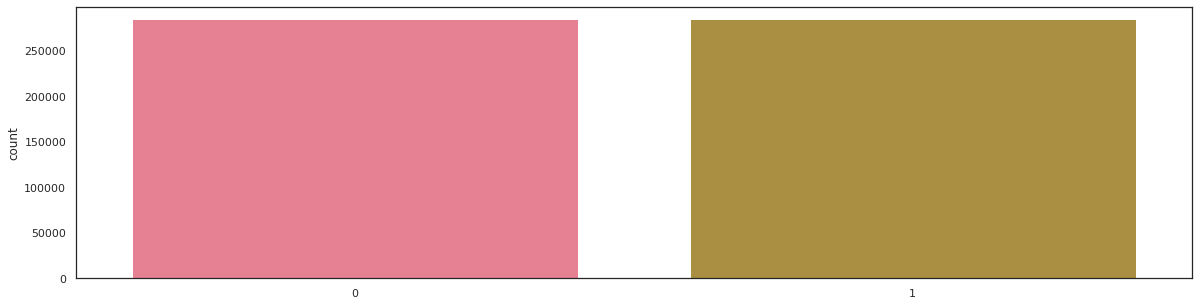

In [77]:
fig,ax=plt.subplots(figsize=(20,5))
sns.countplot(upsampled_data.Class.values)

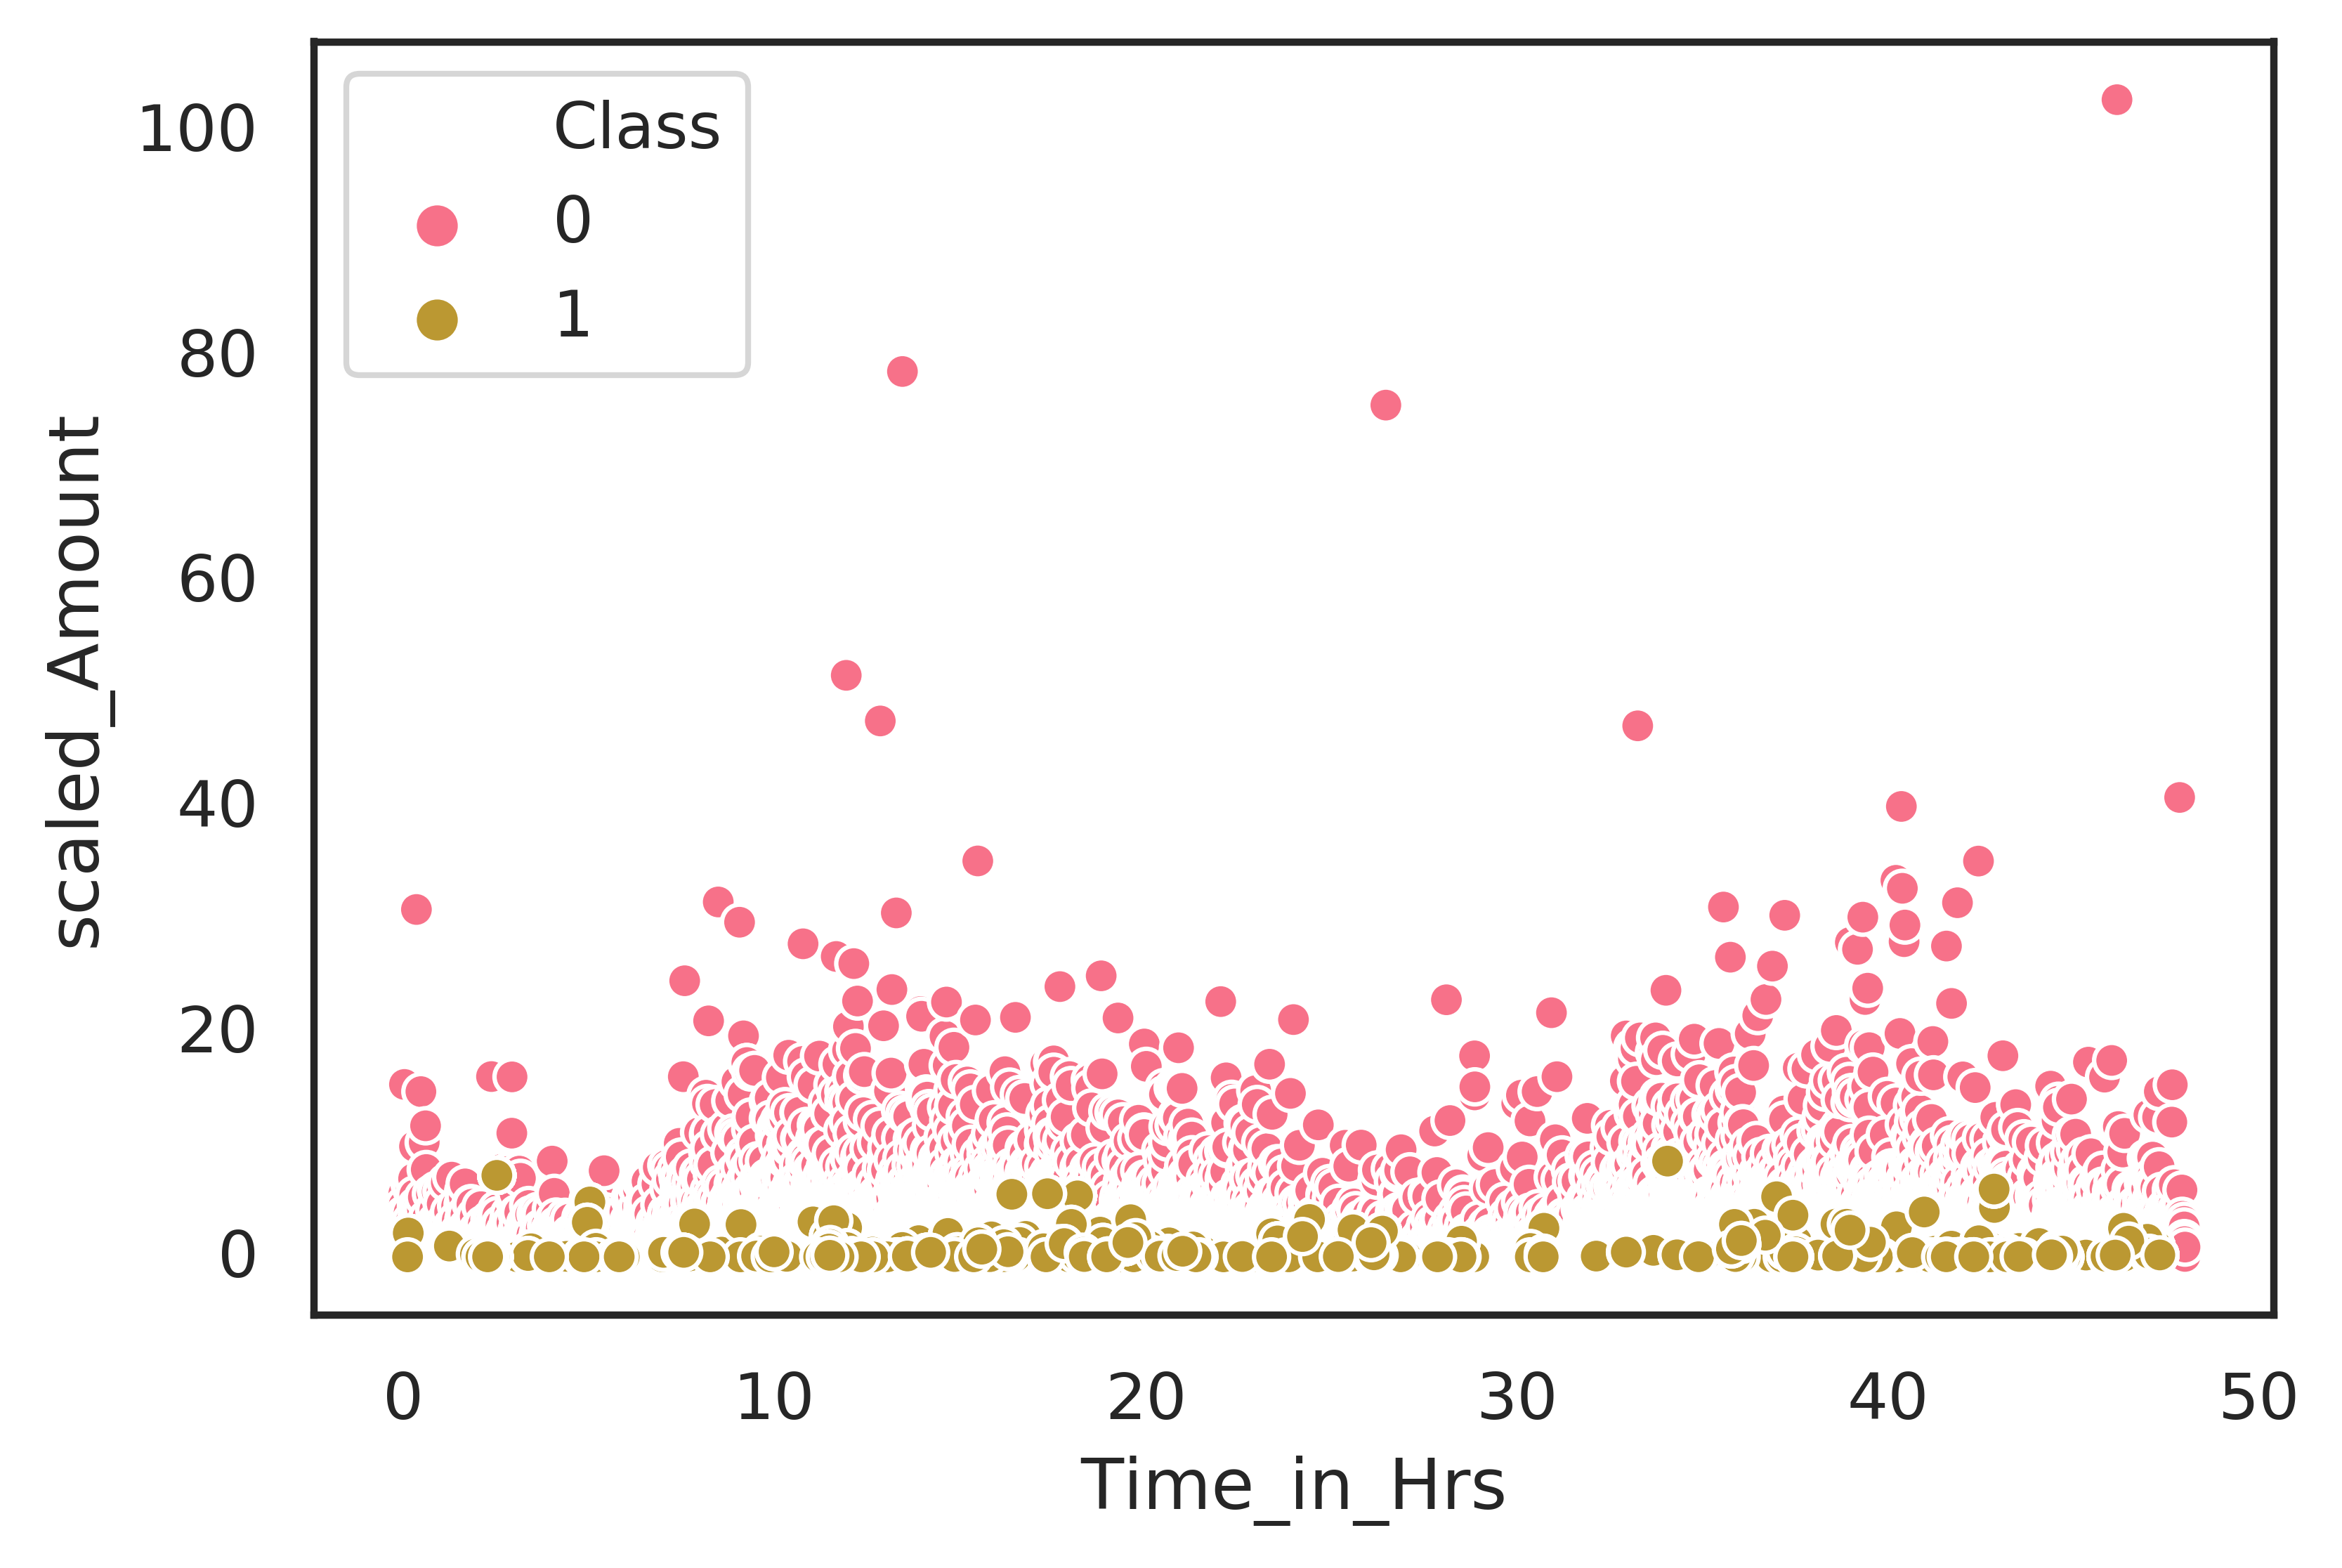

In [78]:
fig=plt.figure(dpi=600)
sns.scatterplot(x='Time_in_Hrs',y='scaled_Amount',hue='Class',data=upsampled_data)
fig.savefig('resampled_scatter_plot.png')

In [39]:
X = upsampled_data.drop(['Class'],axis=1).values
Y = upsampled_data['Class'].values
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.25,random_state=25)

In [40]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
train_pred = model.predict(X_train)
print('train-set confusion matrix:\n ', confusion_matrix(y_train,train_pred))

train-set confusion matrix:
  [[212848      0]
 [     0 213624]]


In [41]:
print('test-set confusion matrix:\n', confusion_matrix(y_test,y_pred)) 
print("recall score: ", recall_score(y_test,y_pred))
print("precision score: ", precision_score(y_test,y_pred))
print("f1 score: ", f1_score(y_test,y_pred))
print("accuracy score: ", accuracy_score(y_test,y_pred))

test-set confusion matrix:
 [[71432    35]
 [    0 70691]]
recall score:  1.0
precision score:  0.9995051324831038
f1 score:  0.9997525050029347
accuracy score:  0.9997537950730877


In [42]:
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
train_pred = model.predict(X_train)
print('train-set confusion matrix:\n ', confusion_matrix(y_train,train_pred))

train-set confusion matrix:
  [[207253   5595]
 [ 30025 183599]]


In [43]:
print('test-set confusion matrix:\n', confusion_matrix(y_test,y_pred)) 
print("recall score: ", recall_score(y_test,y_pred))
print("precision score: ", precision_score(y_test,y_pred))
print("f1 score: ", f1_score(y_test,y_pred))
print("accuracy score: ", accuracy_score(y_test,y_pred))

test-set confusion matrix:
 [[69531  1936]
 [ 9987 60704]]
recall score:  0.8587231755103195
precision score:  0.9690932311621967
f1 score:  0.9105759350788638
accuracy score:  0.9161285330407012


In [44]:
model = LogisticRegression(C = 0.01, penalty = 'l1')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
train_pred = model.predict(X_train)
print('train-set confusion matrix:\n ', confusion_matrix(y_train,train_pred))


/dsci/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


train-set confusion matrix:
  [[208128   4720]
 [ 16857 196767]]


In [45]:
print('test-set confusion matrix:\n', confusion_matrix(y_test,y_pred)) 
print("recall score: ", recall_score(y_test,y_pred))
print("precision score: ", precision_score(y_test,y_pred))
print("f1 score: ", f1_score(y_test,y_pred))
print("accuracy score: ", accuracy_score(y_test,y_pred))

test-set confusion matrix:
 [[69908  1559]
 [ 5639 65052]]
recall score:  0.9202302980577443
precision score:  0.9765954572067677
f1 score:  0.9475754176923861
accuracy score:  0.9493661981738629


In [46]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
train_pred = model.predict(X_train)
print('train-set confusion matrix:\n ', confusion_matrix(y_train,train_pred))

train-set confusion matrix:
  [[212721    127]
 [     0 213624]]


In [47]:
print('test-set confusion matrix:\n', confusion_matrix(y_test,y_pred)) 
print("recall score: ", recall_score(y_test,y_pred))
print("precision score: ", precision_score(y_test,y_pred))
print("f1 score: ", f1_score(y_test,y_pred))
print("accuracy score: ", accuracy_score(y_test,y_pred))

test-set confusion matrix:
 [[71406    61]
 [    0 70691]]
recall score:  1.0
precision score:  0.9991378335594754
f1 score:  0.9995687308668509
accuracy score:  0.9995708999845243


In [48]:
# model = SVC()
# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)
# train_pred = model.predict(X_train)
# print('train-set confusion matrix:\n ', confusion_matrix(y_train,train_pred))

## Under Sampling

In [79]:
not_fraud_down = resample(not_fraud_data, replace = False, n_samples = len(fraud_data), random_state = 25)
down_data = pd.concat([not_fraud_down, fraud_data])
down_data.Class.value_counts()

1    492
0    492
Name: Class, dtype: int64

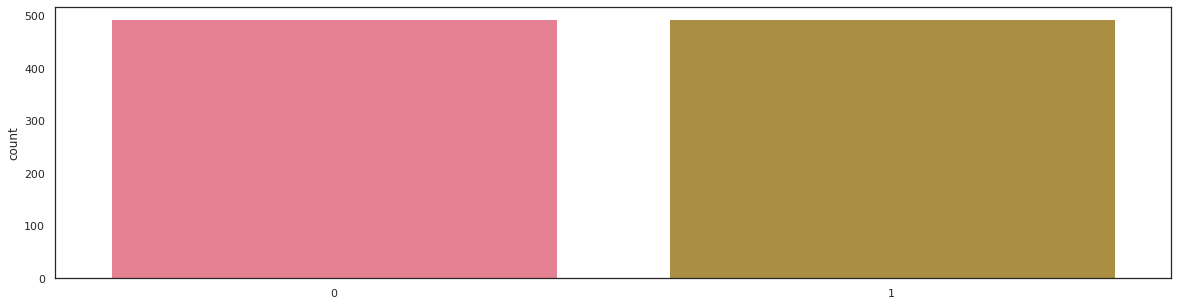

In [80]:
fig,ax=plt.subplots(figsize=(20,5))
sns.countplot(down_data.Class.values)

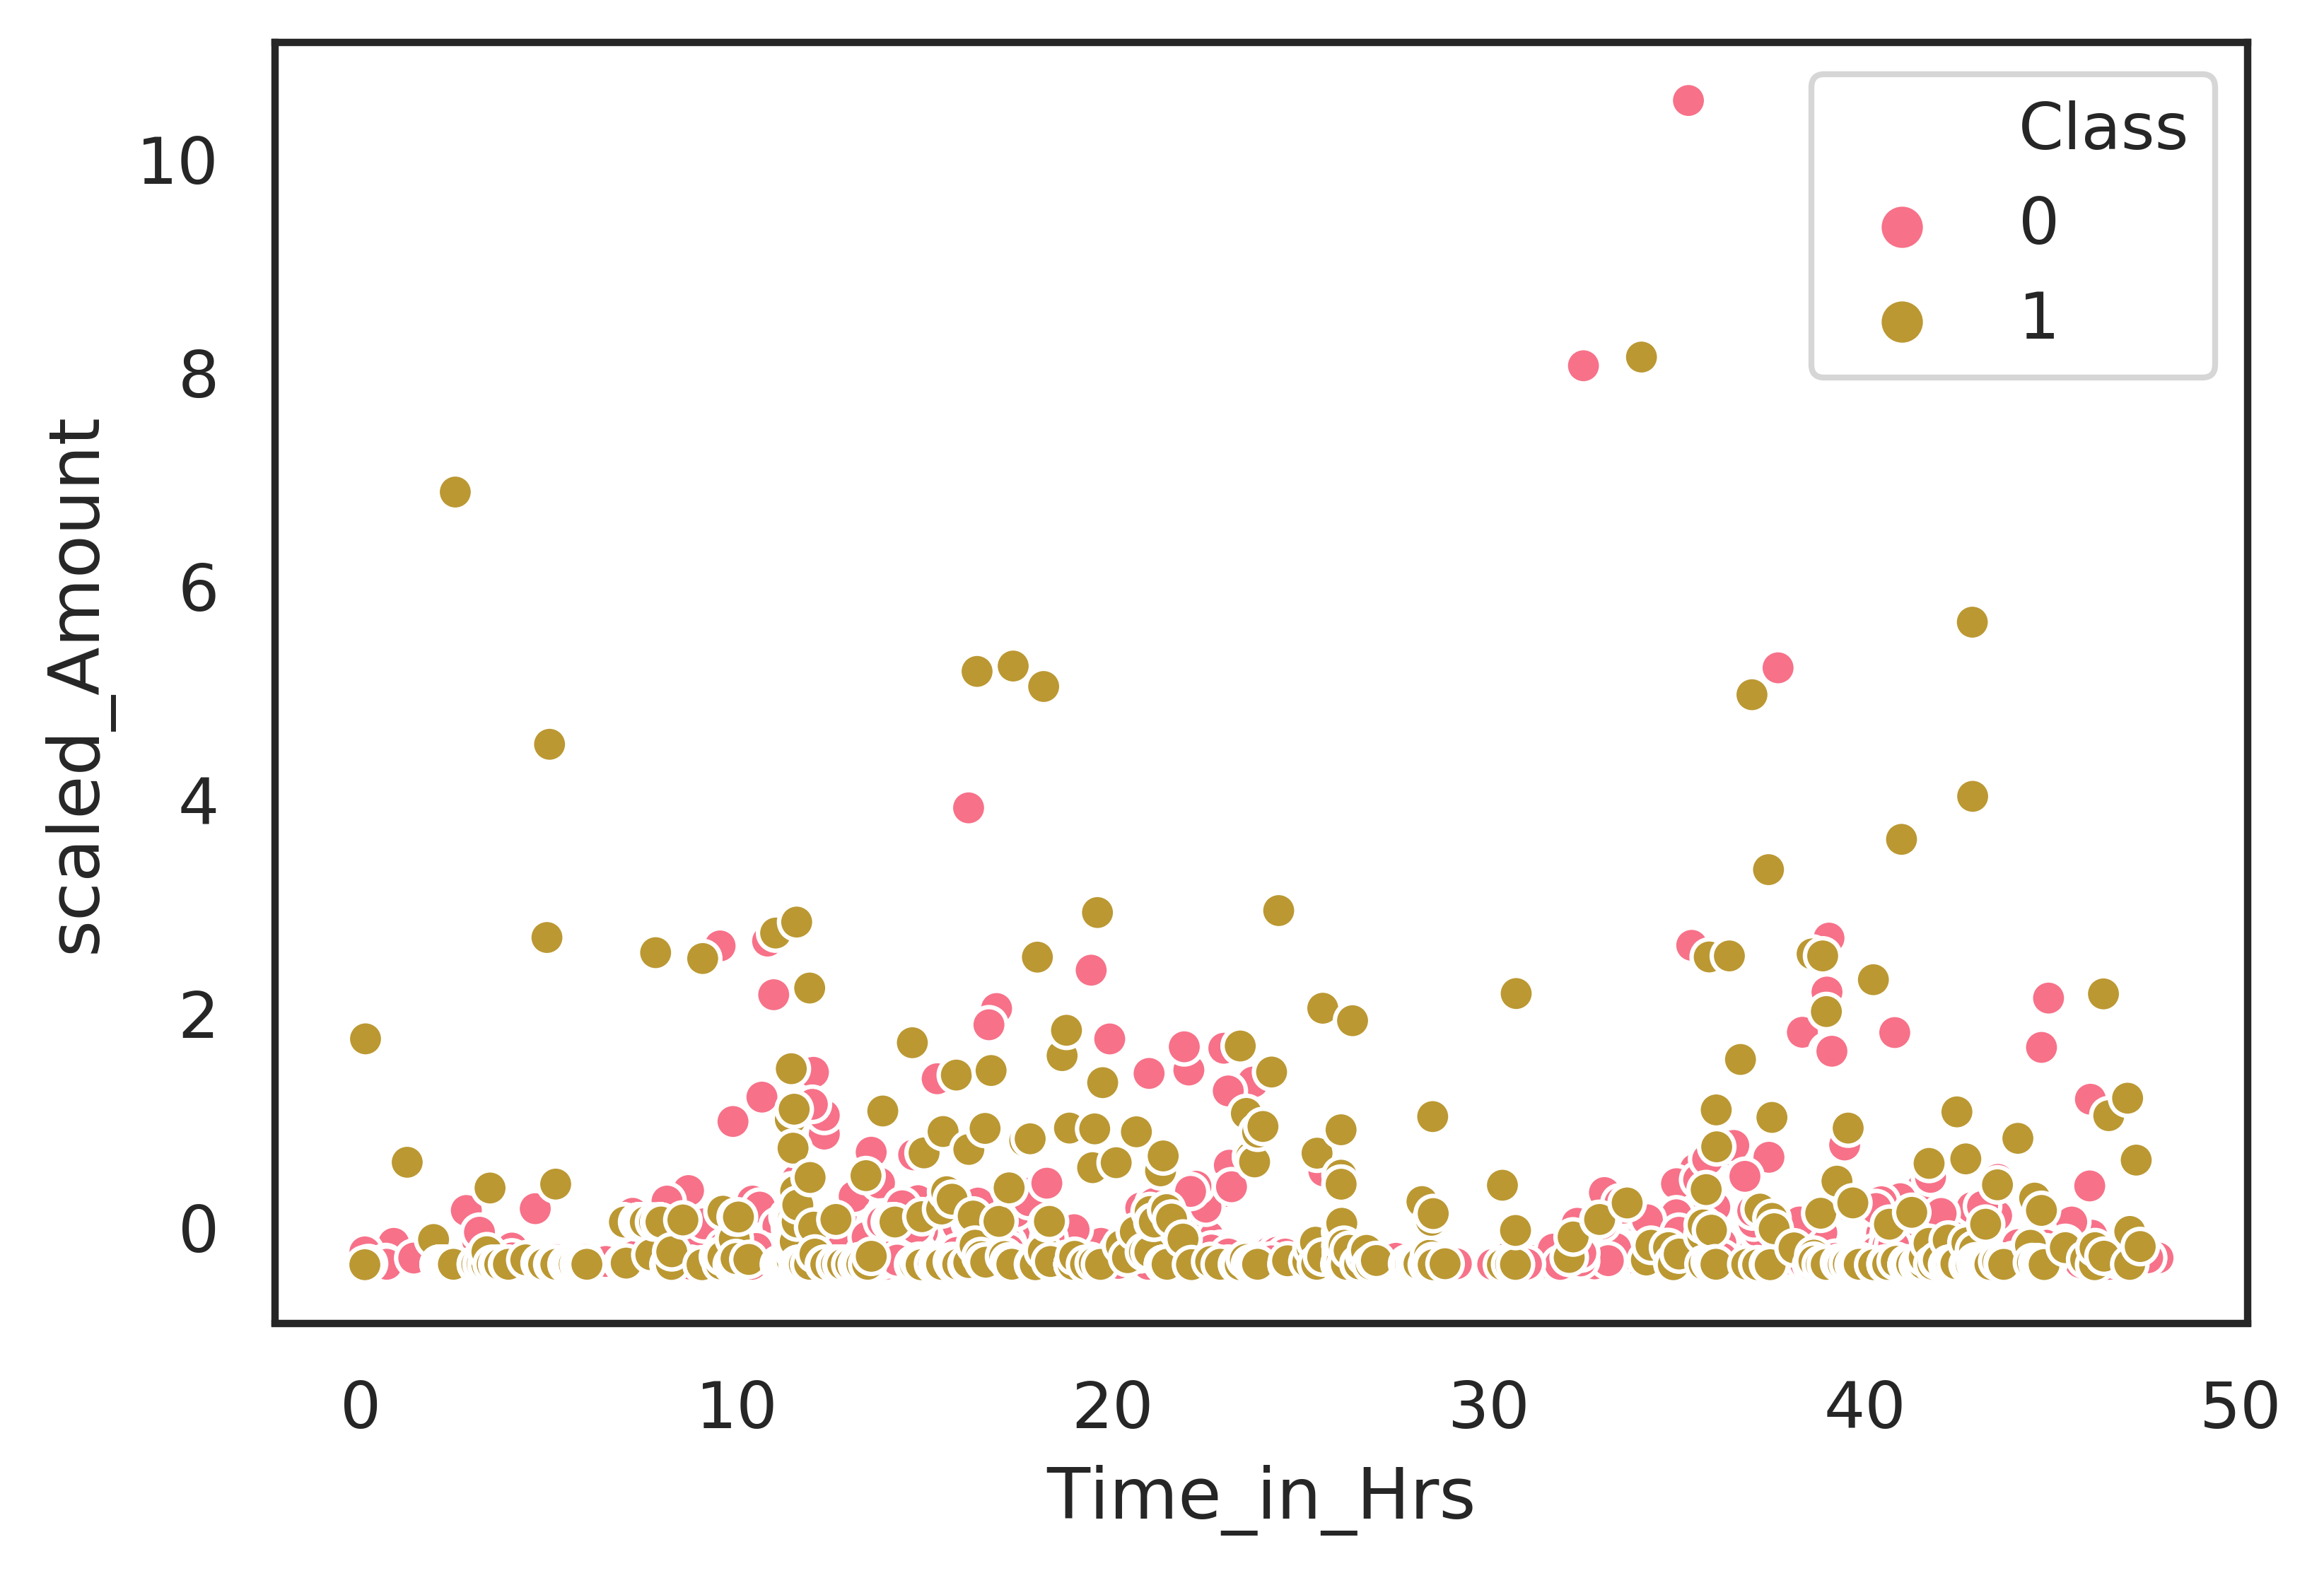

In [81]:
fig=plt.figure(dpi=600)
sns.scatterplot(x='Time_in_Hrs',y='scaled_Amount',hue='Class',data=down_data)
fig.savefig('resampled_scatter_plot.png')

In [50]:
X = down_data.drop(['Class'],axis=1).values
Y = down_data['Class'].values
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.25,random_state=25)

In [51]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
train_pred = model.predict(X_train)
print('train-set confusion matrix:\n ', confusion_matrix(y_train,train_pred))

train-set confusion matrix:
  [[367   0]
 [  0 371]]


In [52]:
print('test-set confusion matrix:\n', confusion_matrix(y_test,y_pred)) 
print("recall score: ", recall_score(y_test,y_pred))
print("precision score: ", precision_score(y_test,y_pred))
print("f1 score: ", f1_score(y_test,y_pred))
print("accuracy score: ", accuracy_score(y_test,y_pred))

test-set confusion matrix:
 [[114  11]
 [  7 114]]
recall score:  0.9421487603305785
precision score:  0.912
f1 score:  0.9268292682926831
accuracy score:  0.926829268292683


In [53]:
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
train_pred = model.predict(X_train)
print('train-set confusion matrix:\n ', confusion_matrix(y_train,train_pred))

train-set confusion matrix:
  [[357  10]
 [ 53 318]]


In [54]:
print('test-set confusion matrix:\n', confusion_matrix(y_test,y_pred)) 
print("recall score: ", recall_score(y_test,y_pred))
print("precision score: ", precision_score(y_test,y_pred))
print("f1 score: ", f1_score(y_test,y_pred))
print("accuracy score: ", accuracy_score(y_test,y_pred))

test-set confusion matrix:
 [[120   5]
 [ 12 109]]
recall score:  0.9008264462809917
precision score:  0.956140350877193
f1 score:  0.927659574468085
accuracy score:  0.9308943089430894


In [55]:
model = LogisticRegression(C = 0.01, penalty = 'l1')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
train_pred = model.predict(X_train)
print('train-set confusion matrix:\n ', confusion_matrix(y_train,train_pred))

train-set confusion matrix:
  [[361   6]
 [ 50 321]]


/dsci/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [56]:
print('test-set confusion matrix:\n', confusion_matrix(y_test,y_pred)) 
print("recall score: ", recall_score(y_test,y_pred))
print("precision score: ", precision_score(y_test,y_pred))
print("f1 score: ", f1_score(y_test,y_pred))
print("accuracy score: ", accuracy_score(y_test,y_pred))

test-set confusion matrix:
 [[123   2]
 [ 10 111]]
recall score:  0.9173553719008265
precision score:  0.9823008849557522
f1 score:  0.9487179487179487
accuracy score:  0.9512195121951219


In [57]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
train_pred = model.predict(X_train)
print('train-set confusion matrix:\n ', confusion_matrix(y_train,train_pred))

train-set confusion matrix:
  [[363   4]
 [ 38 333]]


In [58]:
print('test-set confusion matrix:\n', confusion_matrix(y_test,y_pred)) 
print("recall score: ", recall_score(y_test,y_pred))
print("precision score: ", precision_score(y_test,y_pred))
print("f1 score: ", f1_score(y_test,y_pred))
print("accuracy score: ", accuracy_score(y_test,y_pred))

test-set confusion matrix:
 [[123   2]
 [ 10 111]]
recall score:  0.9173553719008265
precision score:  0.9823008849557522
f1 score:  0.9487179487179487
accuracy score:  0.9512195121951219
